In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature

In [2]:
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im_noisy = ndi.rotate(im, 15, mode='constant')
im_noisy = ndi.gaussian_filter(im_noisy, 4)
im_noisy += 0.2 * np.random.random(im_noisy.shape)

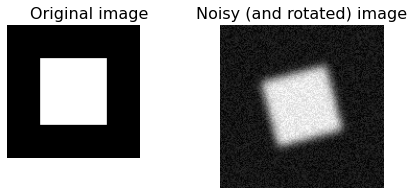

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3),sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Original image', fontsize=16)

ax2.imshow(im_noisy, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Noisy (and rotated) image', fontsize=16)

plt.show()

In [4]:
edges1 = feature.canny(im_noisy, sigma=1)
edges2 = feature.canny(im_noisy, sigma=3)

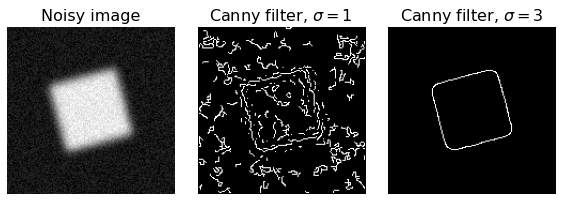

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im_noisy, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Noisy image', fontsize=16)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=16)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=16)

fig.tight_layout()

plt.show()

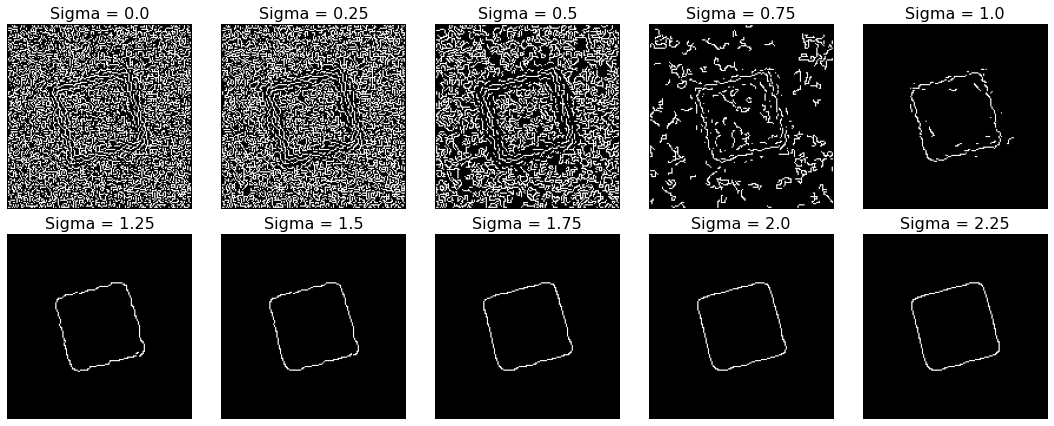

In [6]:
edges =[]

for i in [0.25*i for i in range(1,11)]:
    edges.append(feature.canny(im_noisy, sigma=i))

fig, axes = plt.subplots(figsize=(15,6),nrows=2, ncols=5, sharex=True, sharey=True)

for i in range(10):
    axes.flat[i].imshow(edges[i],cmap=plt.cm.gray)
    axes.flat[i].set_axis_off()
    axes.flat[i].set_title("Sigma = {}".format(0.25*i),fontsize=16)
fig.tight_layout()
plt.show()